## 1. Import

### 1.1. Import the needed libraries 

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

# regular expressions 
import re

# Text Preprocessing 
#nltk.download('stopwords')
#nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from bs4 import BeautifulSoup

# Feature preprocessing and extraction 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder

# Oversampling techniques 
from imblearn.over_sampling import SMOTE, ADASYN   

# Algorithms 
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier

# evaluation report 
from sklearn.metrics import classification_report, confusion_matrix


# 
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('tagsets')

# count time
import time

# import randomized search 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Tomás\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Tomás\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package tagsets to
[nltk_data]     C:\Users\Tomás\AppData\Roaming\nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


### 1.2. Import the Dataset

In [5]:
# importing data
sentence = pd.read_csv("Data-20220517/training_set.txt",sep='\t',header=0)
dev_set = pd.read_csv("Data-20220517/dev_set.txt",sep='\t',header=0)

sentence.head()

,sentence,emotion
0,I'm too old to be traded in .,6
1,Mother said you could always tell a lady by he...,8
2,I always said I'd leave off when the time came .,6
3,He'll be safe with me .,2
4,Lay off .,1


In [18]:
sentence.shape

(14000, 4)

## 2. Text Exploration

### 2.1. Counting Words and StopWords 

In [3]:
def word_counter_stopwords(text_list):
    """
    Function that receives a list of strings and returns the (absolute) frequency of each word in that list of strings.
    """
    words_in_df = ' '.join(text_list).split()
    
    stop_words = set(stopwords.words("english"))               
    n = [w for w in words_in_df if w in stop_words]
    
    # Count all words 
    freq = pd.Series(n).value_counts()
    
    return freq

In [14]:
# Return the top 25 least absolute frequent stopwords
word_counter_stopwords(list(sentence['sentence']))[-25:]

shouldn't     18
under         16
won           15
its           13
hadn't        12
ourselves     11
yourselves     8
that'll        7
further        7
nor            6
mustn't        6
ours           5
herself        5
themselves     5
hasn't         5
should've      4
itself         4
during         4
whom           3
ma             3
above          2
o              2
needn't        2
below          2
m              2
dtype: int64

In [11]:
def word_counter(text_list):
    """
    Function that receives a list of strings and returns the (absolute) frequency of each word in that list of strings.
    """
    words_in_df = ' '.join(text_list).split()
    
    # Count all words 
    freq = pd.Series(words_in_df).value_counts()
    return freq

In [16]:
# Return the top 25 most absolute frequent tokens
word_counter(list(sentence['sentence']))[:25]

.           10600
,            5738
you          3502
I            3208
to           2862
the          2703
?            2696
a            2320
!            1608
[PERSON]     1386
of           1358
and          1266
me           1195
it           1193
that         1156
in           1083
You           950
is            902
for           847
be            761
this          757
I'm           738
have          727
your          690
my            678
dtype: int64

In [30]:
# The total number of different tokens are 8855
len(word_counter(list(sentence['sentence'])))

8855

### 2.2. What tags exist in the sentences?

In [4]:
l = sentence.loc[sentence.sentence.str.contains('(\[\w+\])')].sentence.values
s=[]
for i in l:
    s.extend(re.findall("(\[\w+\])", i))
set(s)

{'[LOCATION]', '[PERSON]'}

### 2.3. How digitis appear in sentences?

In [10]:
sentence.loc[sentence.sentence.str.contains('\d')].sentence.values[:10]

array([',000 , telegrams demanding that he yield this floor .',
       "I'll be yours if you don't kick in with that $ 10 .",
       'Did I spend 9 , years with matadors not to learn about fear and safety ?',
       'When I came here , I thought this was gonna be a 30 - day stretch , maybe 60 .',
       'They say he killed a man when he was 12 , years old .',
       "Besides , according to your story , you weren't exactly 100 % scientist after you took it .",
       'So after 129 , hours of being buried alive , at last , freedom seems in sight .',
       "We've been kicking ass for 200 , years !",
       'The hero of 50,000 , boys and 100,000 , parents .',
       "It's hard to believe that you haven't had sex for 200 , years ."],
      dtype=object)

### 2.4. Words with contractions but that are not part of the stop_words

In [5]:
l = sentence.loc[sentence.sentence.str.contains("\s\w+'\w+")].sentence.values
s=[]
for i in l:
    s.extend(re.findall("\s\w+'\w+", i))
    
stop_words = set(stopwords.words("english"))
                     
n = [w.lower().strip() for w in list(set(s)) if w.lower().strip() not in stop_words]
n[:10]

["lady's",
 "scarecrow's",
 "night's",
 "shooter's",
 "neighbor's",
 "beast's",
 "here's",
 "god's",
 "official's",
 "mama's"]

### 2.5. Distribution Count of Text Lenght and Number of Text Words per Label 

<AxesSubplot:xlabel='emotion', ylabel='text_word_count'>

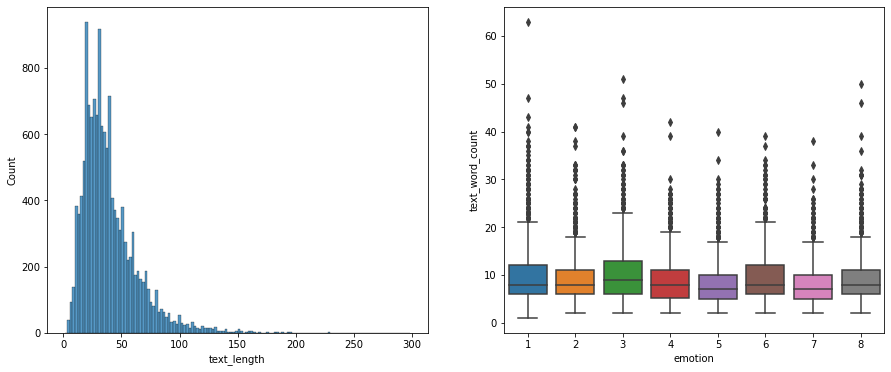

In [17]:
sentence['text_length'] = sentence['sentence'].astype(str).apply(len)
sentence['text_word_count'] = sentence['sentence'].apply(lambda x: len(str(x).split()))

fig, axes = plt.subplots(1, 2, figsize=(15, 6))
sns.histplot(sentence['text_length'],ax=axes[0])
sns.boxplot(x="emotion", y="text_word_count", data=sentence,ax=axes[1])

### 2.6. Label Counting 

In [ ]:
# The worst results are for the labels 3, 4,6 and 7, which are the ones with less training data available

<AxesSubplot:xlabel='emotion'>

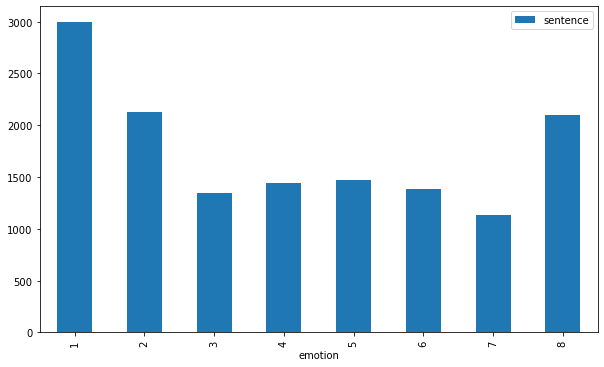

In [7]:
sentence.groupby('emotion').count().plot.bar(figsize=(10,6))

<AxesSubplot:xlabel='emotion'>

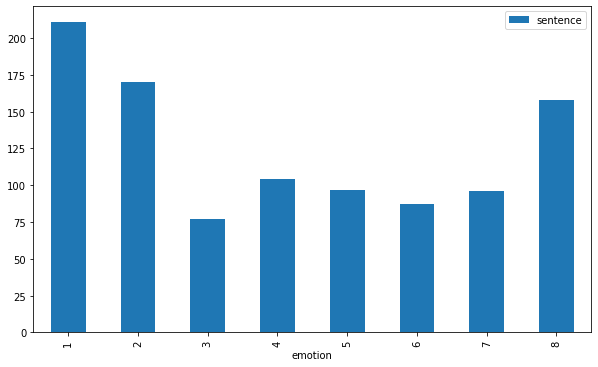

In [8]:
dev_set.groupby('emotion').count().plot.bar(figsize=(10,6))

### 2.7. Most Frequent Unigrams, Bigrams and Trigrams per Label 

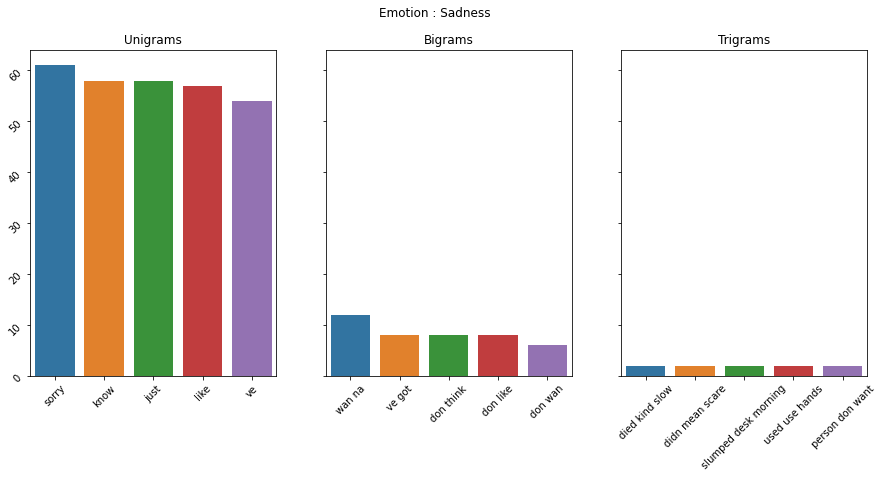

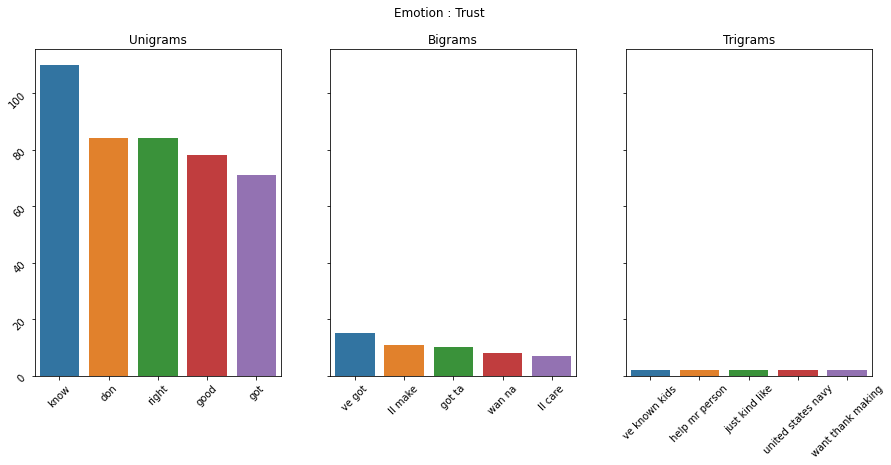

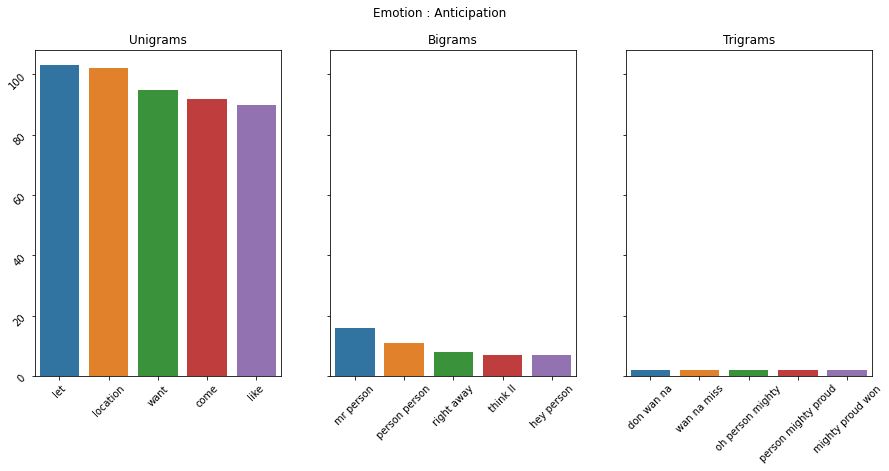

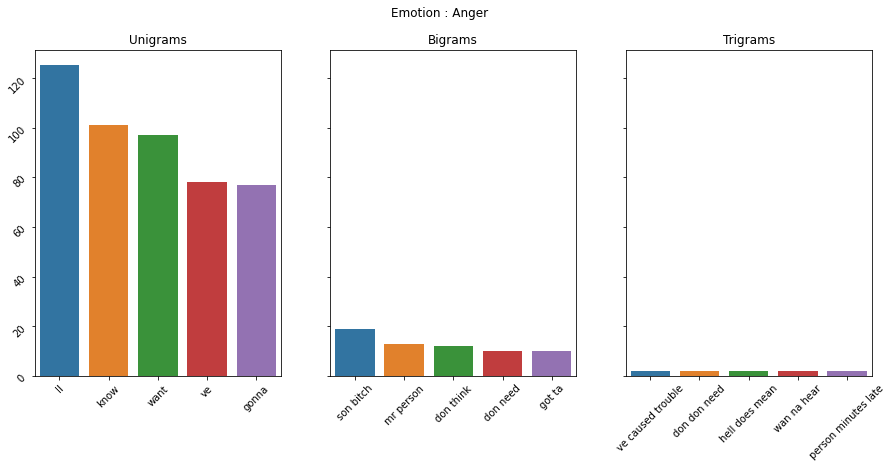

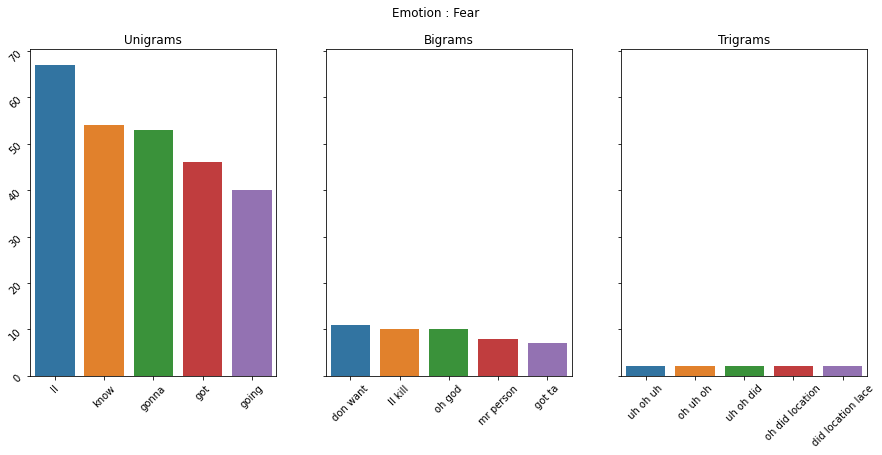

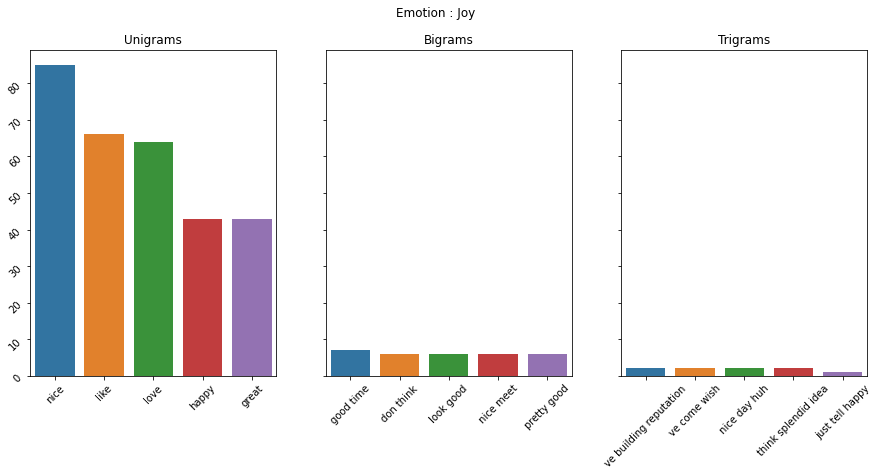

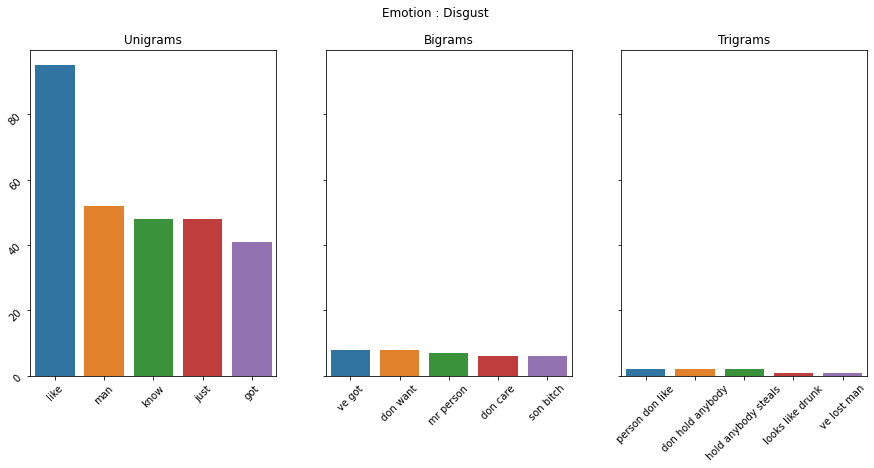

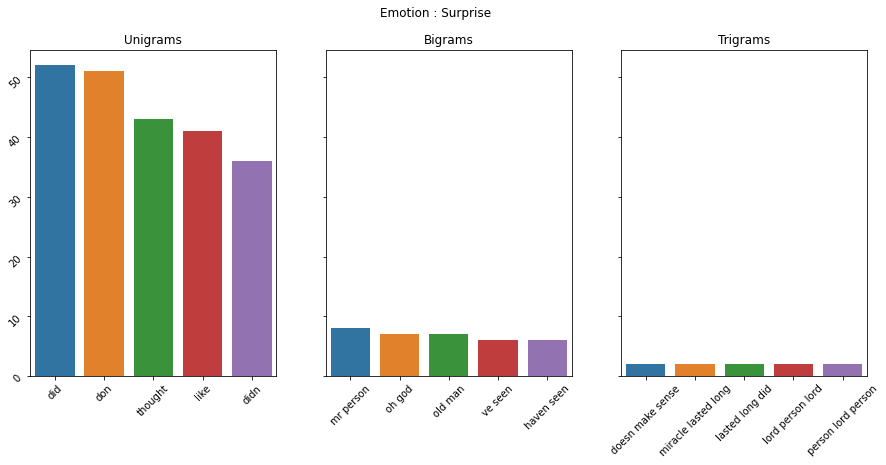

In [5]:
#adapted from https://www.kaggle.com/code/parulpandey/exploratory-data-analysis-of-the-emotion-dataset
def get_top_n_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus) #tokenizer=preprocessing_tok
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

def get_top_n_gram_tfidf(corpus,ngram_range,n=None):
    Tfidf = TfidfVectorizer(
            max_df=0.9,
            max_features=10000, 
            ngram_range=ngram_range,
            tokenizer=preprocessing_tok
            )
    bag_of_words = Tfidf.fit_transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

def plot_count_grams(df):    
    for i in list(df.emotion.unique()):
        emo = df.loc[df.emotion==i].sentence.values
        unigrams = get_top_n_gram(emo,(1,1),7)[2:]
        bigrams = get_top_n_gram(emo,(2,2),7)[2:]
        trigrams = get_top_n_gram(emo,(3,3),7)[2:]

        condlist= [i==1,i==2,i==3,i==4,i==5,i==6,i==7,i==8]
        choicelist = ['Anger','Anticipation','Disgust','Fear','Joy','Sadness','Surprise','Trust']

        fig, axes = plt.subplots(1, 3, figsize=(15, 6), sharey=True)
        fig.suptitle('Emotion : {}'.format(np.select(condlist, choicelist).item()))

        sns.barplot( list(dict(unigrams).keys()), list(dict(unigrams).values()),ax=axes[0],)
        axes[0].set_title('Unigrams')
        axes[0].tick_params(labelrotation=45)

        sns.barplot( list(dict(bigrams).keys()), list(dict(bigrams).values()),ax=axes[1],)
        axes[1].set_title('Bigrams')
        axes[1].tick_params(labelrotation=45)


        sns.barplot( list(dict(trigrams).keys()), list(dict(trigrams).values()),ax=axes[2],)
        axes[2].set_title('Trigrams')
        axes[2].tick_params(labelrotation=45)

plot_count_grams(sentence)

## 3. Pre-processing and Feature Extraction 

In [6]:
#define preprocessing function that will be used in the TfidfVectorizer
def preprocessing_tok1(text):
    '''
        This function do all the steps of preprocessing of text. It is passed in the TF-IDF vectorizer and
        receives a text and return a list with token pre processed:
        
        Input: 'I'm too old to be traded in .'
        Output: ['old', 'traded']
    '''
    processed_corpus = []
    stop_words = set(stopwords.words("english"))
    stop_words.remove('not')

    # Convert to lowercase
    text = text.lower()        
    
    # Remove punctuations
    text = re.sub('(\[location\]|\[person\]|[^a-zA-Z])', ' ', text)
    
    # Convert to list from string
    text = text.split()
    
    # Lemmatization
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in stop_words] 
        
    return text

In [ ]:
#transforme a corpus into a Tfidf matrix (n,m) where n is the number of texts and m the words
TfidfVec = TfidfVectorizer(
            max_df=0.9,
            max_features=10000, 
            ngram_range=(1,3),
            tokenizer=preprocessing_tok1
            )

#Tfidf matrix of training set
Tfidf_matrix = TfidfVec.fit_transform(sentence.sentence.values)
#Tfidf matrix of validation set
Tfidf_matrix_val = TfidfVec.transform(dev_set.sentence.values)

## 4. Classifier

In [35]:
#function that show results for several classifiers 
def Classifier_tester(X,y,x_val,y_val):
    '''
        This function train several different models for the same training set and compare results
        Input: 
            X: array matrix of features
            y: array 1d of training labels
            x_val: array matrix of features with the validation set
            y_val: array 1d with ground truth of validation labels
        Output:
            DataFrame with the results
    
    '''
    clf_list =[
              MultinomialNB(),
              BaggingClassifier (MultinomialNB()),
              BernoulliNB(),
              GaussianNB(),
              RandomForestClassifier(max_depth=5,class_weight='balanced'),
              SVC(kernel='linear'),
              KNeighborsClassifier(n_neighbors=5),
              MLPClassifier(hidden_layer_sizes=(5,5,3)),
              LogisticRegression(class_weight='balanced'),
              BaggingClassifier ( LogisticRegression(class_weight='balanced'))
             ]
    
    #save the list of category names in the order they appear in class. report.
    x = dev_set.emotion.unique()
    condlist= [x==1,x==2,x==3,x==4,x==5,x==6,x==7,x==8]
    choicelist = ['Anger','Anticipation','Disgust','Fear','Joy','Sadness','Surprise','Trust']
    category_names = list(np.select(condlist, choicelist))
    
    results = dict()
    
    for clf in clf_list:
        
        print('Training: ',str(clf))
    
        #train the clf
        clf.fit(X,y)

        #predict for new sentences of the dev set
        y_pred = clf.predict(x_val)
            
        #saves result in dict
        cls_rep = classification_report(y_pred, y_val, target_names=category_names,zero_division=1,output_dict=True)
        
        #delete the support metric
        cls_rep['weighted avg'].pop("support")
        
        #add the accuracy metric
        cls_rep['weighted avg'].update({'accuracy':cls_rep['accuracy']})
        
        #save the weighted avg metrics in the classifer name key
        results[str(clf)] = cls_rep['weighted avg']
        
    return pd.DataFrame(results).round(2)

## 5. Model Training and Results

### 5.1. Standard Results 

In [87]:
#Training arrays
X= Tfidf_matrix.toarray()
y = sentence.emotion.values

#Validation arrays
x_val = Tfidf_matrix_val.toarray()
y_val = dev_set.emotion.values

Classifier_tester(X,y,x_val,y_val)

Training:  MultinomialNB()
Training:  BaggingClassifier(base_estimator=MultinomialNB())
Training:  BernoulliNB()
Training:  GaussianNB()
Training:  RandomForestClassifier(class_weight='balanced', max_depth=5)
Training:  SVC(kernel='linear')
Training:  KNeighborsClassifier()
Training:  MLPClassifier(hidden_layer_sizes=(5, 5, 3))
Training:  LogisticRegression(class_weight='balanced')
Training:  BaggingClassifier(base_estimator=LogisticRegression(class_weight='balanced'))


,MultinomialNB(),BaggingClassifier(base_estimator=MultinomialNB()),BernoulliNB(),GaussianNB(),"RandomForestClassifier(class_weight='balanced', max_depth=5)",SVC(kernel='linear'),KNeighborsClassifier(),"MLPClassifier(hidden_layer_sizes=(5, 5, 3))",LogisticRegression(class_weight='balanced'),BaggingClassifier(base_estimator=LogisticRegression(class_weight='balanced'))
precision,0.63,0.63,0.75,0.36,0.45,0.45,0.30,0.27,0.36,0.35
recall,0.35,0.35,0.29,0.19,0.27,0.36,0.26,0.26,0.35,0.35
f1-score,0.40,0.40,0.37,0.21,0.29,0.38,0.27,0.26,0.34,0.35
accuracy,0.35,0.35,0.29,0.19,0.27,0.36,0.26,0.26,0.35,0.35


### 5.2. Results with oversampling 

#### 5.2.1. SMOTE

In [7]:
#function that show results for several classifiers 
def Classifier_tester_non_balanced(X,y,x_val,y_val):
    '''
        This function train several different models for the same training set and compare results
        Input: 
            X: array matrix of features
            y: array 1d of training labels
            x_val: array matrix of features with the validation set
            y_val: array 1d with ground truth of validation labels
        Output:
            DataFrame with the results
    
    '''
    
    # The algorithms with the parameter 'class weight' defined as balanced on the subchapter 5.1. were removed 
    clf_list =[
              MultinomialNB(),
              BaggingClassifier (MultinomialNB()),
              BernoulliNB(),
              GaussianNB(),
              RandomForestClassifier(max_depth=5),
              SVC(kernel='linear'),
              KNeighborsClassifier(n_neighbors=5),
              MLPClassifier(hidden_layer_sizes=(5,5,3)),
              LogisticRegression(),
              BaggingClassifier ( LogisticRegression())
             ]
    
    #save the list of category names in the order they appear in class. report.
    x = dev_set.emotion.unique()
    condlist= [x==1,x==2,x==3,x==4,x==5,x==6,x==7,x==8]
    choicelist = ['Anger','Anticipation','Disgust','Fear','Joy','Sadness','Surprise','Trust']
    category_names = list(np.select(condlist, choicelist))
    
    results = dict()
    for clf in clf_list:
        
        print('Training: ',str(clf))
    
        #train the clf
        clf.fit(X,y)

        #predict for new sentences of the dev set
        y_pred = clf.predict(x_val)
            
        #saves result in dict
        cls_rep = classification_report(y_pred, y_val, target_names=category_names,zero_division=1,output_dict=True)
        
        #delete the support metric
        cls_rep['weighted avg'].pop("support")
        
        #add the accuracy metric
        cls_rep['weighted avg'].update({'accuracy':cls_rep['accuracy']})
        
        #save the weighted avg metrics in the classifer name key
        results[str(clf)] = cls_rep['weighted avg']
        
    return pd.DataFrame(results).round(2)

In [9]:
# SMOTE 

sm = SMOTE(
    sampling_strategy = 'auto',      # Means it will only sample from the minority class
    random_state = 0,                # reproducibility
    k_neighbors = 5)                 # how many neighbours

X_res, y_res = sm.fit_resample(Tfidf_matrix.toarray(), sentence.emotion.values)

Classifier_tester_non_balanced(X_res,y_res,x_val,y_val)

Training:  MultinomialNB()
Training:  BaggingClassifier(base_estimator=MultinomialNB())
Training:  BernoulliNB()
Training:  GaussianNB()
Training:  RandomForestClassifier(max_depth=5)
Training:  SVC(kernel='linear')
Training:  KNeighborsClassifier()
Training:  MLPClassifier(hidden_layer_sizes=(5, 5, 3))
Training:  LogisticRegression()
Training:  BaggingClassifier(base_estimator=LogisticRegression())


,MultinomialNB(),BaggingClassifier(base_estimator=MultinomialNB()),BernoulliNB(),GaussianNB(),RandomForestClassifier(max_depth=5),SVC(kernel='linear'),KNeighborsClassifier(),"MLPClassifier(hidden_layer_sizes=(5, 5, 3))",LogisticRegression(),BaggingClassifier(base_estimator=LogisticRegression())
precision,0.35,0.33,0.34,0.36,0.40,0.33,0.28,0.29,0.34,0.33
recall,0.34,0.33,0.31,0.19,0.25,0.32,0.25,0.15,0.34,0.33
f1-score,0.34,0.33,0.31,0.21,0.25,0.32,0.25,0.16,0.33,0.32
accuracy,0.34,0.33,0.31,0.19,0.25,0.32,0.25,0.15,0.34,0.33


#### 5.2.2. ADASYN


In [12]:
#ADASYN

ada = ADASYN(
    sampling_strategy='auto',  # Means it will only sample from the minority class
    random_state=0,            # for reproducibility
    n_neighbors=5)             # how many neighbours


X_ada, y_ada = ada.fit_resample(Tfidf_matrix.toarray(), sentence.emotion.values)


Classifier_tester_non_balanced(X_ada,y_ada,x_val,y_val)

Training:  MultinomialNB()
Training:  BaggingClassifier(base_estimator=MultinomialNB())
Training:  BernoulliNB()
Training:  GaussianNB()
Training:  RandomForestClassifier(max_depth=5)
Training:  SVC(kernel='linear')
Training:  KNeighborsClassifier()
Training:  MLPClassifier(hidden_layer_sizes=(5, 5, 3))
Training:  LogisticRegression()
Training:  BaggingClassifier(base_estimator=LogisticRegression())


,MultinomialNB(),BaggingClassifier(base_estimator=MultinomialNB()),BernoulliNB(),GaussianNB(),RandomForestClassifier(max_depth=5),SVC(kernel='linear'),KNeighborsClassifier(),"MLPClassifier(hidden_layer_sizes=(5, 5, 3))",LogisticRegression(),BaggingClassifier(base_estimator=LogisticRegression())
precision,0.36,0.36,0.38,0.36,0.72,0.34,0.28,1.00,0.35,0.35
recall,0.34,0.34,0.30,0.19,0.19,0.33,0.23,0.10,0.34,0.34
f1-score,0.34,0.34,0.30,0.21,0.22,0.33,0.24,0.18,0.34,0.34
accuracy,0.34,0.34,0.30,0.19,0.19,0.33,0.23,0.10,0.34,0.34


### 5.3. Results with Part of Speech Tagging (POS) Preprocessing 

In [17]:
#define preprocessing function that will be used in the TfidfVectorizer
def preprocessing_tok2(text):
    '''
        This function do all the steps of preprocessing of text. It is passed in the TF-IDF vectorizer and
        receives a text and return a list with token pre processed:
        
        Input: 'I'm too old to be traded in .'
        Output: ['old', 'traded']
    '''
    processed_corpus = []
    stop_words = set(stopwords.words("english"))
    stop_words.remove('not')

    # Convert to lowercase
    text = text.lower()        
    
    # Remove punctuations
    text = re.sub('(\[location\]|\[person\]|[^a-zA-Z])', ' ', text)
    
    # Convert to list from string
    #text = text.split()
    
    # POS Tagging
    text = nltk.pos_tag(nltk.word_tokenize(text))
        # Tuple format
    #text = " ".join(str(x) for x in text)
        # Normal format
    text = " ".join(" ".join(x) for x in text)
    
    # Lemmatization
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in stop_words] 
        
    return text

In [19]:
#transforme a corpus into a Tfidf matrix (n,m) where n is the number of texts and m the words
TfidfVec = TfidfVectorizer(
            max_df=0.9,
            max_features=10000, 
            ngram_range=(1,3),
            tokenizer=preprocessing_tok2
            )

#Tfidf matrix of training set
Tfidf_matrix = TfidfVec.fit_transform(sentence.sentence.values)
#Tfidf matrix of validation set
Tfidf_matrix_val = TfidfVec.transform(dev_set.sentence.values)


#Training arrays
X= Tfidf_matrix.toarray()
y = sentence.emotion.values


#Validation arrays
x_val = Tfidf_matrix_val.toarray()
y_val = dev_set.emotion.values

Classifier_tester(X,y,x_val,y_val)

Training:  MultinomialNB()
Training:  BaggingClassifier(base_estimator=MultinomialNB())
Training:  BernoulliNB()
Training:  GaussianNB()
Training:  RandomForestClassifier(class_weight='balanced', max_depth=5)
Training:  SVC(kernel='linear')
Training:  KNeighborsClassifier()
Training:  MLPClassifier(hidden_layer_sizes=(5, 5, 3))
Training:  LogisticRegression(class_weight='balanced')
Training:  BaggingClassifier(base_estimator=LogisticRegression(class_weight='balanced'))


,MultinomialNB(),BaggingClassifier(base_estimator=MultinomialNB()),BernoulliNB(),GaussianNB(),"RandomForestClassifier(class_weight='balanced', max_depth=5)",SVC(kernel='linear'),KNeighborsClassifier(),"MLPClassifier(hidden_layer_sizes=(5, 5, 3))",LogisticRegression(class_weight='balanced'),BaggingClassifier(base_estimator=LogisticRegression(class_weight='balanced'))
precision,0.62,0.61,0.31,0.55,0.31,0.47,0.37,0.38,0.32,0.32
recall,0.31,0.31,0.24,0.14,0.23,0.35,0.30,0.23,0.30,0.30
f1-score,0.36,0.37,0.24,0.18,0.24,0.38,0.31,0.28,0.30,0.31
accuracy,0.31,0.31,0.24,0.14,0.23,0.35,0.30,0.23,0.30,0.30


### 5.4. Results Interpretation

### 5.4.1. Standard linear SVC 

In [6]:
begin=time.perf_counter() 
#transforme a corpus into a Tfidf matrix (n,m) where n is the number of texts and m the words
TfidfVec = TfidfVectorizer(
            max_df=0.9,
            max_features=10000, 
            ngram_range=(1,3),
            tokenizer=preprocessing_tok1
            )

#Tfidf matrix of training set
Tfidf_matrix = TfidfVec.fit_transform(sentence.sentence.values)
#Tfidf matrix of validation set
Tfidf_matrix_val = TfidfVec.transform(dev_set.sentence.values)


#Training arrays
X= Tfidf_matrix.toarray()
y = sentence.emotion.values


#Validation arrays
x_val = Tfidf_matrix_val.toarray()
y_val = dev_set.emotion.values

# Support vector classification algorithm 
clf=SVC(kernel='linear')

#train the clf
clf.fit(X,y)

#predict for new sentences of the dev set
y_pred = clf.predict(x_val)

#evaluation metrics 
print(classification_report(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))

end=time.perf_counter()
timer=end-begin
print(f"timing {timer}") 

              precision    recall  f1-score   support

           1       0.33      0.65      0.44       211
           2       0.42      0.42      0.42       170
           3       0.20      0.10      0.14        77
           4       0.30      0.23      0.26       104
           5       0.43      0.38      0.40        97
           6       0.37      0.20      0.26        87
           7       0.37      0.16      0.22        96
           8       0.40      0.31      0.35       158

    accuracy                           0.36      1000
   macro avg       0.35      0.31      0.31      1000
weighted avg       0.36      0.36      0.34      1000

[[137  22   8  18   3   8   4  11]
 [ 46  71   9   8   7   1   7  21]
 [ 43   8   8   5   2   3   2   6]
 [ 42  12   2  24   6   5   2  11]
 [ 23  13   3   3  37   4   3  11]
 [ 32  14   2   6   7  17   4   5]
 [ 35  12   2  10   9   5  15   8]
 [ 55  19   6   6  16   3   4  49]]
timing 2223.3572229


#### 5.4.2. ADASYN

In [10]:
begin=time.perf_counter() 

TfidfVec = TfidfVectorizer(
            max_df=0.9,
            max_features=10000, 
            ngram_range=(1,3),
            tokenizer=preprocessing_tok1
            )

#Tfidf matrix of training set
Tfidf_matrix = TfidfVec.fit_transform(sentence.sentence.values)
#Tfidf matrix of validation set
Tfidf_matrix_val = TfidfVec.transform(dev_set.sentence.values)

#Validation arrays
x_val = Tfidf_matrix_val.toarray()
y_val = dev_set.emotion.values


ada = ADASYN(
    sampling_strategy='auto',  # Means it will only sample from the minority class
    random_state=0,            # for reproducibility
    n_neighbors=5)             # how many neighbours

X_ada, y_ada = ada.fit_resample(Tfidf_matrix.toarray(), sentence.emotion.values)

# Support vector classification algorithm 
clf=SVC(kernel='linear')

#train the clf
clf.fit(X_ada,y_ada)

#predict for new sentences of the dev set
y_pred = clf.predict(x_val)

#evaluation metrics 
print(classification_report(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))

end=time.perf_counter()
timer=end-begin
print(f"timing {timer}") 


              precision    recall  f1-score   support

           1       0.41      0.37      0.39       211
           2       0.41      0.34      0.37       170
           3       0.23      0.22      0.23        77
           4       0.28      0.31      0.29       104
           5       0.40      0.46      0.43        97
           6       0.28      0.28      0.28        87
           7       0.21      0.38      0.27        96
           8       0.40      0.27      0.32       158

    accuracy                           0.33      1000
   macro avg       0.33      0.33      0.32      1000
weighted avg       0.35      0.33      0.34      1000

[[79 15 20 24  5 20 36 12]
 [18 58 10 17 13  8 25 21]
 [20  7 17  6  4  6 11  6]
 [18  7  6 32  5  8 18 10]
 [ 6  9  4  2 45  6 14 11]
 [17 10  2  8  7 24 16  3]
 [12  9  5 16 11  6 36  1]
 [24 25  9  8 22  8 19 43]]
timing 4388.438919400003


In [12]:
# There's many more rows 
X_ada.shape

(22737, 10000)

### 5.5. Fine-tuning Best Approach 

#### 5.5.1. SVC with parameter C=50

In [9]:
begin=time.perf_counter() 

# Support vector classification algorithm 
clf=SVC(kernel='linear', C=50)

#train the clf
clf.fit(X,y)

#predict for new sentences of the dev set
y_pred = clf.predict(x_val)

#evaluation metrics 
print(classification_report(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))

end=time.perf_counter()
timer=end-begin
print(f"timing {timer}") 

              precision    recall  f1-score   support

           1       0.32      0.50      0.39       211
           2       0.40      0.41      0.41       170
           3       0.21      0.19      0.20        77
           4       0.29      0.24      0.26       104
           5       0.37      0.32      0.34        97
           6       0.23      0.21      0.22        87
           7       0.29      0.18      0.22        96
           8       0.33      0.26      0.29       158

    accuracy                           0.32      1000
   macro avg       0.31      0.29      0.29      1000
weighted avg       0.32      0.32      0.31      1000

[[105  29  14  16   6  17  13  11]
 [ 33  70  13  12   9   7   9  17]
 [ 29   6  15   6   3   5   6   7]
 [ 32  11   5  25   6  10   3  12]
 [ 19  12   6   0  31   7   2  20]
 [ 28  14   4   4   4  18   5  10]
 [ 27  11   5  11  10   8  17   7]
 [ 51  20   8  12  14   8   4  41]]
timing 2651.3392669999994


#### 5.5.2. TfidfVectorizer with parameter max_features=20000

In [7]:
begin=time.perf_counter() 
#transforme a corpus into a Tfidf matrix (n,m) where n is the number of texts and m the words
TfidfVec = TfidfVectorizer(
            max_df=0.9,
            max_features=20000, 
            ngram_range=(1,3),
            tokenizer=preprocessing_tok1
            )

#Tfidf matrix of training set
Tfidf_matrix = TfidfVec.fit_transform(sentence.sentence.values)
#Tfidf matrix of validation set
Tfidf_matrix_val = TfidfVec.transform(dev_set.sentence.values)


#Training arrays
X= Tfidf_matrix.toarray()
y = sentence.emotion.values


#Validation arrays
x_val = Tfidf_matrix_val.toarray()
y_val = dev_set.emotion.values

# Support vector classification algorithm 
clf=SVC(kernel='linear')

#train the clf
clf.fit(X,y)

#predict for new sentences of the dev set
y_pred = clf.predict(x_val)

#evaluation metrics 
print(classification_report(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))

end=time.perf_counter()
timer=end-begin
print(f"timing {timer}") 

              precision    recall  f1-score   support

           1       0.33      0.61      0.43       211
           2       0.40      0.42      0.41       170
           3       0.18      0.09      0.12        77
           4       0.30      0.22      0.25       104
           5       0.40      0.38      0.39        97
           6       0.35      0.21      0.26        87
           7       0.36      0.16      0.22        96
           8       0.36      0.29      0.32       158

    accuracy                           0.35      1000
   macro avg       0.33      0.30      0.30      1000
weighted avg       0.34      0.35      0.33      1000

[[129  21  11  19   3   9   4  15]
 [ 46  72   7   6   9   2   7  21]
 [ 41  10   7   5   2   4   1   7]
 [ 40  13   2  23   5   6   2  13]
 [ 21  11   3   3  37   5   4  13]
 [ 30  15   1   6  10  18   3   4]
 [ 33  14   2   9  10   5  15   8]
 [ 53  22   5   6  17   3   6  46]]
timing 3577.298510499999


#### 5.5.3. TfidfVectorizer with parameter max_features=5000

In [8]:
begin=time.perf_counter() 
#transforme a corpus into a Tfidf matrix (n,m) where n is the number of texts and m the words
TfidfVec = TfidfVectorizer(
            max_df=0.9,
            max_features=5000, 
            ngram_range=(1,3),
            tokenizer=preprocessing_tok1
            )

#Tfidf matrix of training set
Tfidf_matrix = TfidfVec.fit_transform(sentence.sentence.values)
#Tfidf matrix of validation set
Tfidf_matrix_val = TfidfVec.transform(dev_set.sentence.values)


#Training arrays
X= Tfidf_matrix.toarray()
y = sentence.emotion.values


#Validation arrays
x_val = Tfidf_matrix_val.toarray()
y_val = dev_set.emotion.values

# Support vector classification algorithm 
clf=SVC(kernel='linear')

#train the clf
clf.fit(X,y)

#predict for new sentences of the dev set
y_pred = clf.predict(x_val)

#evaluation metrics 
print(classification_report(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))

end=time.perf_counter()
timer=end-begin
print(f"timing {timer}") 

              precision    recall  f1-score   support

           1       0.32      0.65      0.43       211
           2       0.41      0.42      0.42       170
           3       0.22      0.10      0.14        77
           4       0.33      0.24      0.28       104
           5       0.41      0.34      0.37        97
           6       0.33      0.17      0.23        87
           7       0.33      0.14      0.19        96
           8       0.41      0.32      0.36       158

    accuracy                           0.35      1000
   macro avg       0.34      0.30      0.30      1000
weighted avg       0.35      0.35      0.33      1000

[[137  24   6  18   3   7   4  12]
 [ 46  72  10   7   7   1   6  21]
 [ 41   9   8   6   1   5   2   5]
 [ 41  11   2  25   6   4   2  13]
 [ 27  12   3   1  33   5   5  11]
 [ 36  13   1   6   8  15   4   4]
 [ 39  13   2   9   8   5  13   7]
 [ 57  20   4   4  15   4   4  50]]
timing 1190.0310410999991
